# Анализ данных и машинное обучение

## Теоретические свведения

**Определение Data Sience (Википедия)**

Наука о данных (англ. data science; иногда даталогия — datalogy) — раздел информатики, изучающий проблемы анализа, обработки и представления данных в цифровой форме. Объединяет методы по обработке данных в условиях больших объёмов и высокого уровня параллелизма, статистические методы, методы интеллектуального анализа данных и приложения искусственного интеллекта для работы с данными, а также методы проектирования и разработки баз данных.

Рассматривается как академическая дисциплина, а с начала 2010-х годов, во многом благодаря популяризации концепции «больших данных», — и как практическая межотраслевая сфера деятельности, притом специализация исследователя данных (англ. data scientist — «учёного по данным») с начала 2010-х годов считается одной из самых привлекательных, высокооплачиваемых и перспективных профессий

**Структура процесса DS**

Процесс Data Science:


1.   Назначение цели исследования: \\
        Определение цели исследования \\
        Создание проектного задания
2.   Сбор данных
3.   Подготовка данных
4.   Исследование данных
5.   Моделирование данных
6.   Отображение и автоматизация

## Кейс туризм

Цель исследования: оценить потребности региона РФ в туристических кадрах.

Проектное задание: построить модель, позволяющую получать прогноз некоторого показателя, по которому можно проверять гипотезы о тенденциях спроса на персонал туристических фирм в регионе.


### Общие импорты

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

### Мое решение

In [22]:
def predict_count_of_companies(data, pred_feature, years, estimator, threshold=0.7):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  fill_nan_estimator = LinearRegression(normalize=True)
  fill_coef_dict = {}

  for column in data.columns[1:]:
    xy_data = data[['Год', column]].dropna().values
    x_train = xy_data[:, 0].reshape(-1,1)
    y_train = xy_data[:, 1].reshape(-1,1)
    fill_nan_estimator.fit(x_train, y_train)
    fill_coef_dict[column] = [fill_nan_estimator.score(x_train, y_train), fill_nan_estimator.intercept_, fill_nan_estimator.coef_]

  def fill_nan(data, dict_coeff, column):
    return data['Год'] * fill_coef_dict[column][2].item() + fill_coef_dict[column][1].item()

  for column in data.columns[1:]:
    if (fill_coef_dict[column][0] < threshold):
      data[column] = data[column].fillna(data[column].mean())
    else:
      data[column] = data[column].fillna(fill_nan(data, fill_coef_dict, column))

  y = data[pred_feature].values
  data.pop(pred_feature)
  X = data.values

  estimator.fit(X,y)
  print(f'Коэффициент детерминации: {estimator.score(X,y)}')
  y_pred = estimator.predict(X)

  future = pd.DataFrame(index=range(years), columns=data.columns)
  last_year = data.iloc[[-1]]['Год'].item()
  future['Год'] = range(last_year+1, last_year+1+years)
  
  for column in future.columns[1:]:
      future[column] = future[column].fillna(fill_nan(future, fill_coef_dict, column))

  X_future = future.values
  y_future = estimator.predict(X_future)

  plt.figure(figsize=(12,8))
  plt.plot(X[:,0], y, '*')
  plt.plot(X[:,0], y_pred, 'o g')
  plt.plot(X_future[:,0], y_future, 'o b')
  plt.title(pred_feature)

  result = pd.DataFrame(index=range(years), columns=['Год', pred_feature])
  result['Год'] = range(last_year+1, last_year+1+years)
  result[pred_feature] = y_future
  print(result)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Коэффициент детерминации: 0.9710524362775853
    Год  Средняя численность работников, включая внешних совместителей
0  2020                                         754.414533            
1  2021                                         780.276662            
2  2022                                         806.138791            
3  2023                                         832.000921            
4  2024                                         857.863050            
5  2025                                         883.725179            
6  2026                                         909.587309            
7  2027                                         935.449438            
8  2028                                         961.311567            
9  2029                                         987.173697            


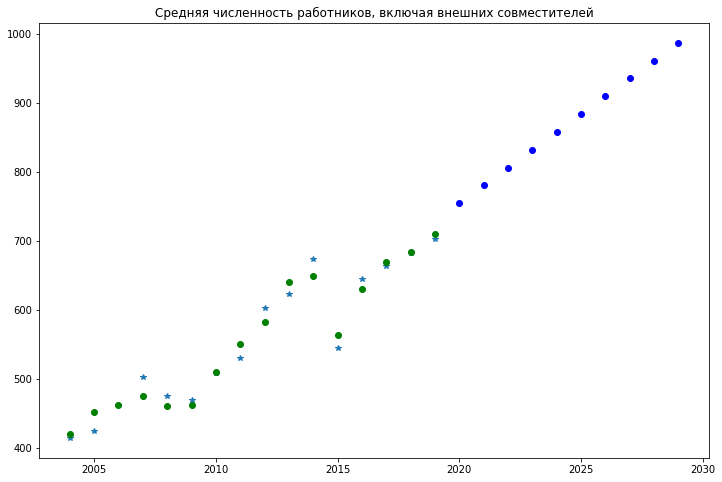

In [24]:
data = pd.read_excel('/content/drive/MyDrive/Study/Colab/Case_Tourism/data/tourizm_omsk.xlsx', 2)
predict_count_of_companies(data, 'Средняя численность работников, включая внешних совместителей', 10, LinearRegression())

### Решение на паре

Сбор данных

Данные были взяты из следующих источников: ... </br>
Временной период для данных - начиная с 2004 года по 2019 год.</br>
Данные были консолидированы в таблицу Excel: tourizm_omsk.xlsx на страницу Данные.

In [25]:
data = pd.read_excel('/content/drive/MyDrive/Study/Colab/Case_Tourism/data/tourizm_omsk.xlsx', 2)
data

Год  ...  Индекс стоимости жизни
0   2004  ...                     NaN
1   2005  ...                     NaN
2   2006  ...                     NaN
3   2007  ...                     NaN
4   2008  ...                     NaN
5   2009  ...                     NaN
6   2010  ...                   84.52
7   2011  ...                   83.09
8   2012  ...                   83.14
9   2013  ...                   84.12
10  2014  ...                   85.15
11  2015  ...                   85.31
12  2016  ...                   85.26
13  2017  ...                   84.67
14  2018  ...                   85.19
15  2019  ...                   87.66

[16 rows x 10 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Год                                                                           16 non-null     int64  
 1   Доходы гостиниц и аналогичных средств размещения                              10 non-null     float64
 2   Число гостиниц и средств размещения                                           10 non-null     float64
 3   Численность размещенных лиц в гостиницах и ананлогичных средствах размещения  10 non-null     float64
 4   Число ночевок в гостиницах и ананлогичных средствах размещения                10 non-null     float64
 5   Средняя численность работников, включая внешних совместителей                 12 non-null     float64
 6   Число туристских фирм               

Подготовка и исследование данных

In [27]:
data_corr = data.corr()[['Год', 'Число туристских фирм']]
data_corr

Год  Число туристских фирм
Год                                                 1.000000               0.934490
Доходы гостиниц и аналогичных средств размещения    0.791770               0.884303
Число гостиниц и средств размещения                 0.740742               0.328591
Численность размещенных лиц в гостиницах и анан...  0.324730               0.686848
Число ночевок в гостиницах и ананлогичных средс...  0.437263               0.484621
Средняя численность работников, включая внешних...  0.868412               0.944873
Число туристских фирм                               0.934490               1.000000
Средства, поступившие от реализации туристкого ... -0.738940              -0.164993
Число реализованных турпакетов населению           -0.341667               0.193351
Индекс стоимости жизни                              0.766095               0.474867

In [28]:
data.columns[1:]

Index(['Доходы гостиниц и аналогичных средств размещения',
       'Число гостиниц и средств размещения',
       'Численность размещенных лиц в гостиницах и ананлогичных средствах размещения',
       'Число ночевок в гостиницах и ананлогичных средствах размещения',
       'Средняя численность работников, включая внешних совместителей',
       'Число туристских фирм',
       'Средства, поступившие от реализации туристкого продукта',
       'Число реализованных турпакетов населению', 'Индекс стоимости жизни'],
      dtype='object')

In [29]:
lr = LinearRegression(normalize=True)
dict_coeff = {}

for column in data.columns[1:]:
  xy_data = data[['Год', column]].dropna().values
  x_train = xy_data[:, 0].reshape(-1,1)
  y_train = xy_data[:, 1].reshape(-1,1)
  lr.fit(x_train, y_train)
  dict_coeff[column] = [lr.score(x_train, y_train), lr.intercept_, lr.coef_]
  print(f'Коэффициент детерминации {column}: {dict_coeff[column][0]: .3f}')

Коэффициент детерминации Доходы гостиниц и аналогичных средств размещения:  0.627
Коэффициент детерминации Число гостиниц и средств размещения:  0.549
Коэффициент детерминации Численность размещенных лиц в гостиницах и ананлогичных средствах размещения:  0.105
Коэффициент детерминации Число ночевок в гостиницах и ананлогичных средствах размещения:  0.191
Коэффициент детерминации Средняя численность работников, включая внешних совместителей:  0.754
Коэффициент детерминации Число туристских фирм:  0.873
Коэффициент детерминации Средства, поступившие от реализации туристкого продукта:  0.546
Коэффициент детерминации Число реализованных турпакетов населению:  0.117
Коэффициент детерминации Индекс стоимости жизни:  0.587


Заполним малодетерминированные столбцы средними значениями, а существенно детерминированные - с помощью модели линейной регрессии

In [30]:
def fill(dict_coeff, column):
  return  data['Год'] * dict_coeff[column][2].item() + dict_coeff[column][1].item()

for column in data.columns[1:]:
  if (dict_coeff[column][0] < 0.7):
    data[column] = data[column].fillna(data[column].mean())
  else:
    data[column] = data[column].fillna(fill(dict_coeff, column))
data

Год  ...  Индекс стоимости жизни
0   2004  ...                  84.811
1   2005  ...                  84.811
2   2006  ...                  84.811
3   2007  ...                  84.811
4   2008  ...                  84.811
5   2009  ...                  84.811
6   2010  ...                  84.520
7   2011  ...                  83.090
8   2012  ...                  83.140
9   2013  ...                  84.120
10  2014  ...                  85.150
11  2015  ...                  85.310
12  2016  ...                  85.260
13  2017  ...                  84.670
14  2018  ...                  85.190
15  2019  ...                  87.660

[16 rows x 10 columns]

Моделирование

In [31]:
y = data['Средняя численность работников, включая внешних совместителей'].values
data.pop('Средняя численность работников, включая внешних совместителей')
X = data.values

In [32]:
lr = LinearRegression(normalize=True).fit(X,y)
print(f'Коэффициент детерминации: {lr.score(X,y)}')

Коэффициент детерминации: 0.9710524362775808


Промежуточный вывод

В качестве порога для отбора детерминирующих признаков подходит число 0.7

In [33]:
y_pred_lr = lr.predict(X)

In [34]:
bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=20, max_features=7).fit(X,y)
print(f'Коэффициент детерминации: {bag.score(X,y)}')

Коэффициент детерминации: 0.9685189320470451


In [35]:
y_pred_bag = bag.predict(X)

Отображение

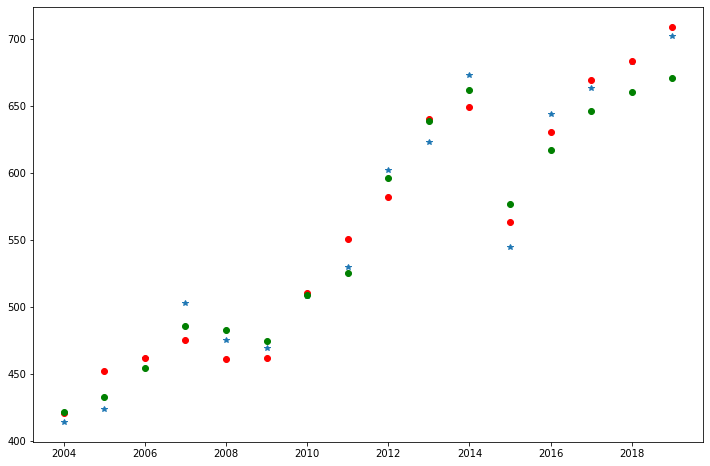

In [36]:
plt.figure(figsize=(12,8))
plt.plot(X[:,0], y, '*')
plt.plot(X[:,0], y_pred_lr, 'o r')
plt.plot(X[:,0], y_pred_bag, 'o g');